In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from datetime import datetime 

In [14]:
df=pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\No_show\KaggleV2-May-2016.csv')

In [37]:
df.head(22)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,appointmentDay,scheduledDay,interval,Period
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0,Afternoon
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0,Afternoon
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0,Afternoon
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0,Afternoon
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0,Afternoon
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Friday,Wednesday,1,very Early Morning
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday,Wednesday,1,Afternoon
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday,Wednesday,1,Afternoon
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Friday,Friday,0,very Early Morning
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Friday,Wednesday,1,Morning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


First, I we will turn our date info into more manageable datetime data type. Also, let's draw out what day of the week the the appointmnet was made and what day of the week the visit was scheduled for.

In [15]:
df['AppointmentDay']=df['AppointmentDay'].apply(np.datetime64)
df['ScheduledDay']=df['ScheduledDay'].apply(np.datetime64)


df['appointmentDay']=df['AppointmentDay'].dt.day_name()
df['scheduledDay']=df['ScheduledDay'].dt.day_name()

Also useful for our ml modeling is getting the # of days between the appoinment being made and the day it is scheduled for. 

In [18]:
df["Interval"] = abs(df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [24]:
df['Period'] = pd.cut(df['ScheduledDay'].dt.hour,[0,8,12,18,24],labels=['very Early Morning','Morning','Afternoon','Night'])

Fortunately, that this dataset has no values. 

In [21]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
appointmentDay    False
scheduledDay      False
interval          False
dtype: bool

## Determine if natural outliers or erroneous data entry

With Age there appears to have been a patient with a listed age just over 110. That is very old but not impossible, I will decide to keep it.

<AxesSubplot:xlabel='Age'>

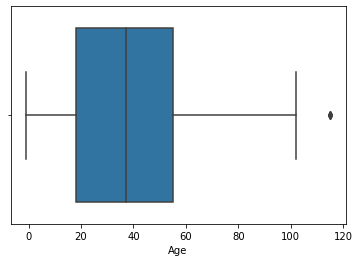

In [26]:
sns.boxplot(x=df['Age'])

In [33]:
print(df['Scholarship'].unique()) 
print(df['Hipertension'].unique()) 
print(df['Diabetes'].unique()) 
print(df['Alcoholism'].unique()) 
print(df['Handcap'].unique()) 
print(df['SMS_received' ].unique())

[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]


There appears to be at least one age entry that is -1. Depending on how many times this age occurs, we will delete if we can think it was entry error.  

In [35]:
print(sorted(df['Age'].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [36]:
print(len(df))
df = df[df.Age != -1]
print(len(df))

110527
110526
